<a href="https://colab.research.google.com/github/MilanBandara/Fall-detection-device/blob/main/Fall_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import os
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [9]:
from google.colab import drive
drive.mount('/content/drive')
# Set the path to the folder containing .npy images
folder_path = "/content/drive/MyDrive/Deep Learning Projects/Fall_detection/data"
file_list = []
for i in range(1,41):
  element = "data"+str(i)+".npy"
  file_list.append(element)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Creating an array containg all the training data
num_files = len(file_list)
height = 1000
width = 6
file_shape = (height, width)
x_training_data = np.empty((num_files,) + file_shape)
y_training_data = np.ones(40,np.int8) #may cause problems if not float

for i,name in enumerate(file_list):
  file_path = os.path.join(folder_path, name)
  data = np.load(file_path)[1:] #Can add a row containg the label so that easier to shuffle
  x_training_data[i] = data.T

In [27]:
print(x_training_data.shape)

(40, 1000, 6)


ValueError: ignored

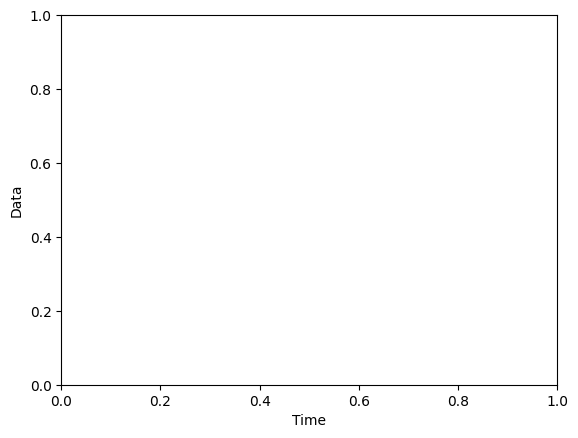

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Data')
time = np.arange(0,1000,1)
ax.plot(time, x_training_data[9][0], 'r-', label='Acc X')
ax.plot(time, x_training_data[9][1], 'g-', label='Acc Y')
ax.plot(time, x_training_data[9][2], 'b-', label='Acc Z')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_training_data, y_training_data, test_size=0.33, random_state=42)

In [30]:
print(X_train.shape)

(26, 1000, 6)


In [31]:
model = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(1000,6)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 998, 32)           608       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 499, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 497, 64)           6208      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 248, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 246, 128)          24704     
                                                                 
 global_average_pooling1d_6   (None, 128)             

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 3s 472ms/step - loss: 5.7753 - accuracy: 0.9000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 100ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e

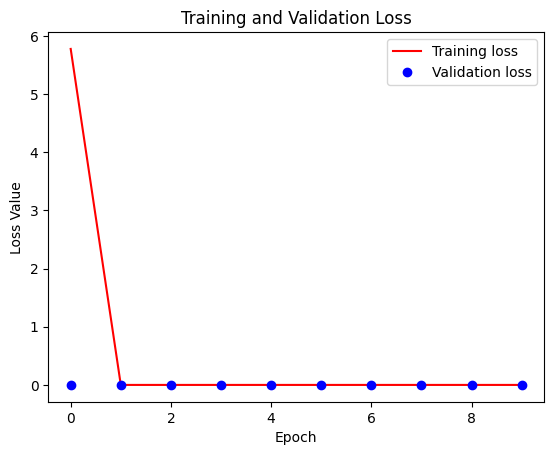

In [36]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure()
plt.plot( loss, 'r', label='Training loss')
plt.plot( val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()